## Meet Professor William Sharpe

![alt text](https://www.nobelprize.org/uploads/2018/06/sharpe-interview-photo.jpg "William Sharpe")

An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?

Enter William Sharpe. He introduced the reward-to-variability ratio in 1966 that soon came to be called the **Sharpe Ratio**.
It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.

The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the **capital asset pricing model (CAPM)**.

The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the 3-month Treasury Bill Rate.

So let's learn about the Sharpe ratio by calculating it for the stocks of the two tech giants Microsoft and Amazon. As benchmark we'll use the S&P 500 that measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.

In [23]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline


# GET SP 500 and 2 stocks 
import pandas_datareader.data as web
from datetime import datetime

# select start and end date
start = datetime(2016, 1, 1)
end = datetime(2018, 12, 31)

# Download stock data
msft = web.DataReader('MSFT', 'yahoo', start, end).dropna()
amazon = web.DataReader('AMZN', 'yahoo', start, end).dropna()

# Chose date and adjusted close
# Merge Dataframes
tesla_adj_close = msft.iloc[:,-1]
amazon_adj_close = amazon['Adj Close']

# concatonate and rename columns to company names
stocks = pd.concat([tesla_adj_close,amazon_adj_close], axis = 1)
stocks.columns = ['MSFT', 'Amazon']

# Get Benchmark data (S&P 500)
sp500 = web.get_data_yahoo('^GSPC', start, end).dropna()

# select adj close price and rename the column title and turn it back into a dataframe
benchmark = sp500.iloc[:,-1]
benchmark = pd.DataFrame(benchmark)
benchmark.columns = ['S&P 500']

### 2. A first glance at the data
Let's take a look the data to find out how many observations and variables we have at our disposal

In [3]:
# Display summary for stock_data
print('Stocks\n')
stocks.info()
display(stocks)
# Display summary for benchmark_data
print('\nBenchmarks\n')
# ... YOUR CODE FOR TASK 2 HERE ...
benchmark.info()
benchmark.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-01-04 to 2018-12-31
Data columns (total 2 columns):
MSFT      754 non-null float64
Amazon    754 non-null float64
dtypes: float64(2)
memory usage: 17.7 KB


,MSFT,Amazon
Date,,
2016-01-04,50.536495,636.989990
2016-01-05,50.767044,633.789978
2016-01-06,49.844841,632.650024
2016-01-07,48.111115,607.940002
2016-01-08,48.258663,607.049988
...,...,...
2018-12-24,92.758461,1343.959961
2018-12-26,99.094772,1470.900024
2018-12-27,99.705742,1461.640015



Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-01-04 to 2018-12-31
Data columns (total 1 columns):
S&P 500    754 non-null float64
dtypes: float64(1)
memory usage: 11.8 KB


,S&P 500
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029


### 3. Plot & summarize daily prices for Microsoft and Amazon
Before we compare an investment in either Microsoft or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.

,MSFT,Amazon
count,754.000000,754.000000
mean,73.143130,1102.603475
std,20.555923,420.497643
min,45.297375,482.070007
25%,54.360600,767.392517
50%,68.078163,967.894989
75%,91.296391,1499.262512
max,113.435432,2039.510010


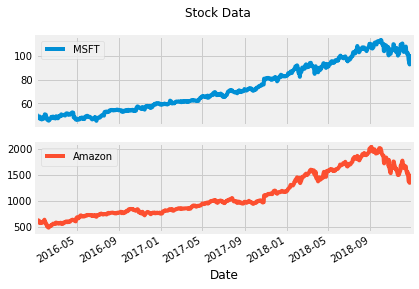

In [4]:
# visualize the stock_data
stocks.plot(subplots=True, title = "Stock Data");

# summarize the stock_data
stocks.describe()

### 4. Visualize & summarize daily values for the S&P 500
Let's also take a closer look at the value of the S&P 500, our benchmark.

,S&P 500
count,754.000000
mean,2429.535875
std,286.074202
min,1829.079956
25%,2169.075012
50%,2434.145020
75%,2690.084961
max,2930.750000


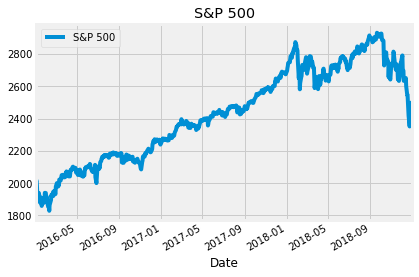

In [5]:
# plot the benchmark_data
benchmark.plot(title="S&P 500")

# summarize the benchmark_data
benchmark.describe()

### 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.
However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?

,MSFT,Amazon
count,753.000000,753.000000
mean,0.001009,0.001310
std,0.014225,0.018506
min,-0.071710,-0.078197
25%,-0.004878,-0.006241
50%,0.000868,0.001434
75%,0.007810,0.009935
max,0.075705,0.132164


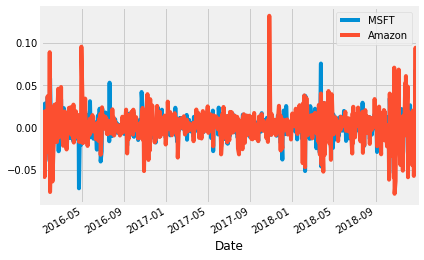

In [6]:
# calculate daily stock_data returns
stock_returns = stocks.pct_change()

# plot the daily returns
stock_returns.plot()

# summarize the daily returns
stock_returns.describe()

### 6. Daily S&P 500 returns
For the S&P 500, calculating daily returns works just the same way, we just need to make sure we select it as a Series using single brackets [] and not as a DataFrame to facilitate the calculations in the next step.

count    753.000000
mean       0.000325
std        0.008172
min       -0.040979
25%       -0.002357
50%        0.000397
75%        0.004089
max        0.049594
Name: S&P 500, dtype: float64

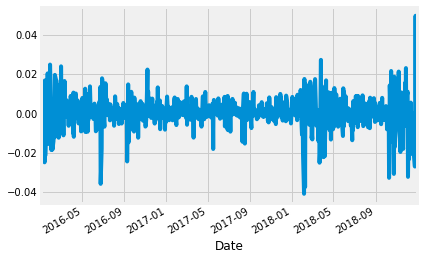

In [7]:
# calculate daily benchmark_data returns
sp_returns = benchmark["S&P 500"].pct_change()

# plot the daily returns
sp_returns.plot();

# summarize the daily returns
sp_returns.describe()

### 7. Calculating Excess Returns for Microsoft and Amazon vs. S&P 500
Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,MSFT,Amazon
count,753.000000,753.000000
mean,0.000684,0.000985
std,0.009346,0.014862
min,-0.071758,-0.100860
25%,-0.003965,-0.005710
50%,0.000409,0.000761
75%,0.005244,0.007709
max,0.056046,0.124091


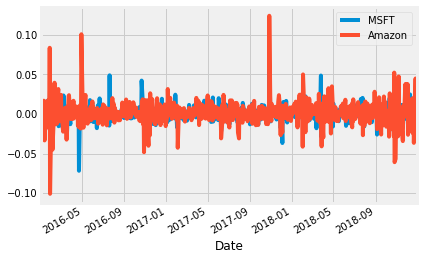

In [8]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot();

# summarize the excess_returns
excess_returns.describe()

### 8. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

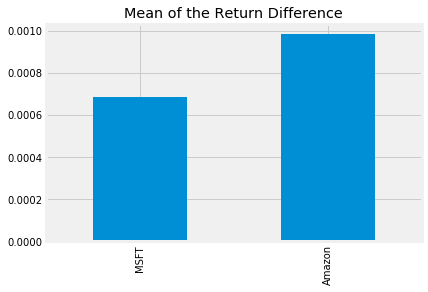

In [9]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title="Mean of the Return Difference")

### 9. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
It looks like there was quite a bit of a difference between average daily returns for Amazon and Microsoft.
Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

MSFT      0.009346
Amazon    0.014862
dtype: float64


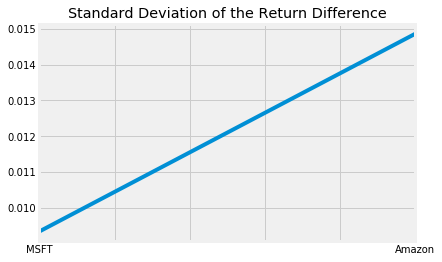

In [10]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()
print(sd_excess_return)

# plot the standard deviations
sd_excess_return.plot(title="Standard Deviation of the Return Difference");

### 10. Putting it all together
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.
The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

Annual Sharp-Ratio: 
 MSFT      1.161539
Amazon    1.051936
dtype: float64


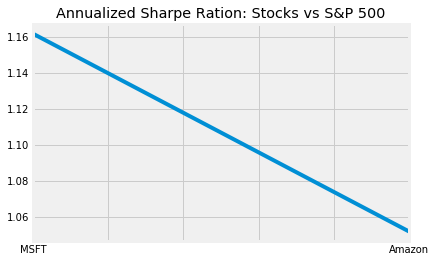

In [11]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
print('Annual Sharp-Ratio: \n', annual_sharpe_ratio)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot(title="Annualized Sharpe Ration: Stocks vs S&P 500");

### 11. Conclusion
Given the two Sharpe ratios, which investment should we go for?

Amazons, returns are higher than those of Microsoft, however, the later had a higher Sharp-ratio in 2019. This means that an **investment in Microsoft returned more** as compared to the S&P 500 for each unit of risk an investor would have assumed.

In other words, in risk-adjusted terms, the investment in Microsoft would have been more attractive.
This difference was mostly driven by risk between Microsoft and Amazon rather than difference in return. The risk of choosing Amazon over Microsoft (as measured by the standard deviation) was slightly higher so that the higher Sharpe ratio for Microsoft ends up higher mainly due to the lover standard deviation (volatility) for Microsoft.

However, when looking at the portfolio it is important to look at the whole portfolio together rather than just individual investments. 'Of course, the higher the Sharpe ratio the better. But given no other information, you can’t tell whether a Sharpe ratio of 1.5 is good or bad. Only when you compare one fund’s Sharpe ratio with that of another fund (or group of funds) do you get a feel for its risk-adjusted return relative to other funds.'<br>

*Source: http://news.morningstar.com/classroom2/course.asp?docId=2932&page=5&CN=com*

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.